In [2]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
861,tech,long life promised for laptop pcs scientists a...
609,sport,england given tough sevens draw england will h...
185,sport,almagro continues spanish surge unseeded nicol...
765,business,lufthansa flies back to profit german airline ...
1002,entertainment,jamelia s return to the top r&b star jamelia h...
...,...,...
577,sport,hearts of oak 3-2 cotonsport hearts of oak set...
47,politics,campaign cold calls questioned labour and th...
2140,sport,celts savour grand slam prospect the six natio...
268,business,ex-boeing director gets jail term an ex-chief ...


In [4]:
#No of a categories
len(set(df['category']))

5

In [5]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

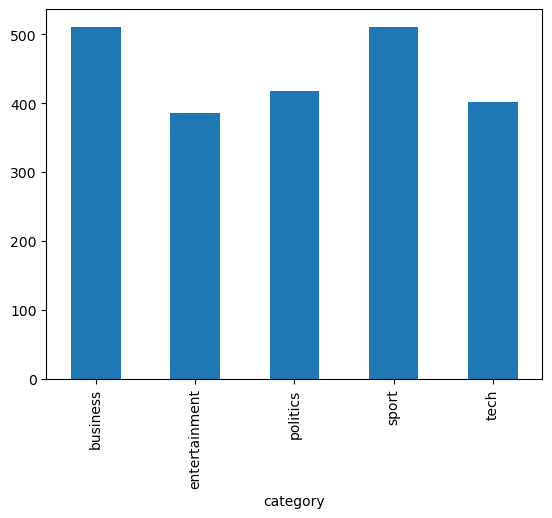

In [6]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [7]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['text'][0]).lower()
regs

'tv future in the hands of viewers with home theatre systems  plasma high definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time   that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes  with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices   one of the most talked about technologies of ces has been digital and personal video recorders  dvr and pvr   these set top boxes  like the us s tivo and the uk s sky  system  allow people to record  store  play  pause and forward wind tv programmes when they want   essentially  the technology allows for much more personalised tv  they are also being built in to high

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [10]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues we

In [11]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
861,tech,long life promised for laptop pcs scientists a...,long life promis for laptop pc scientist are w...
609,sport,england given tough sevens draw england will h...,england given tough seven draw england will ha...
185,sport,almagro continues spanish surge unseeded nicol...,almagro continu spanish surg unseed nicola alm...
765,business,lufthansa flies back to profit german airline ...,lufthansa fli back to profit german airlin luf...
1002,entertainment,jamelia s return to the top r&b star jamelia h...,jamelia s return to the top r&b star jamelia h...
...,...,...,...
577,sport,hearts of oak 3-2 cotonsport hearts of oak set...,heart of oak 3-2 cotonsport heart of oak set u...
47,politics,campaign cold calls questioned labour and th...,campaign cold call question labour and the con...
2140,sport,celts savour grand slam prospect the six natio...,celt savour grand slam prospect the six nation...
268,business,ex-boeing director gets jail term an ex-chief ...,ex-bo director get jail term an ex-chief finan...


In [12]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,text,cleaned
861,tech,long life promised for laptop pcs scientists a...,long life promi laptop pc scientist work way e...
609,sport,england given tough sevens draw england will h...,england given tough seven draw england negoti ...
185,sport,almagro continues spanish surge unseeded nicol...,almagro continu spanish surg unse nicola almag...
765,business,lufthansa flies back to profit german airline ...,lufthansa fli back profit german airlin luftha...
1002,entertainment,jamelia s return to the top r&b star jamelia h...,jamelia return top r b star jamelia three brit...
...,...,...,...
577,sport,hearts of oak 3-2 cotonsport hearts of oak set...,heart oak cotonsport heart oak set ghanaian co...
47,politics,campaign cold calls questioned labour and th...,campaign cold call question labour conserv sti...
2140,sport,celts savour grand slam prospect the six natio...,celt savour grand slam prospect six nation ha ...
268,business,ex-boeing director gets jail term an ex-chief ...,ex bo director get jail term ex chief financ o...


In [13]:
df.to_csv('cleaned_news.csv')

In [14]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [15]:
# print(words)

In [16]:
# words = stopwords.words("nepali")
# words

In [17]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [18]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")
X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [19]:
print(X_test,y_test)

1598    fa probe crowd troubl fa take action troubl ma...
1337    big war game battl arriv new titl popular meda...
1919    iraqi win death test case probe famili iraqi c...
1411    net fingerprint combat attack eighti larg net ...
1087    us interest rate increa us interest rate rise ...
                              ...                        
1677    absa barclay talk continu south africa biggest...
690     mp attack mugger kenya mp ha hi passport stole...
1799    peac demo appeal reject peac protestor lost la...
2076    look music drive mobil mobil phone still enjoy...
685     iraq afghanistan wto talk world trade organi w...
Name: cleaned, Length: 334, dtype: object 1598       sport
1337        tech
1919    politics
1411        tech
1087    business
          ...   
1677    business
690     politics
1799    politics
2076        tech
685     business
Name: category, Length: 334, dtype: object


In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9760479041916168


['sport' 'tech' 'politics' 'tech' 'business' 'entertainment' 'politics'
 'sport' 'sport' 'tech' 'sport' 'business' 'politics' 'business'
 'entertainment' 'entertainment' 'politics' 'tech' 'business'
 'entertainment' 'entertainment' 'tech' 'sport' 'business' 'politics'
 'sport' 'sport' 'sport' 'sport' 'politics' 'entertainment' 'politics'
 'politics' 'tech' 'sport' 'tech' 'business' 'entertainment' 'tech'
 'politics' 'tech' 'sport' 'business' 'tech' 'sport' 'politics' 'politics'
 'politics' 'tech' 'entertainment' 'politics' 'business' 'entertainment'
 'tech' 'sport' 'business' 'tech' 'business' 'tech' 'entertainment'
 'business' 'tech' 'politics' 'tech' 'politics' 'sport' 'business'
 'business' 'tech' 'tech' 'sport' 'politics' 'entertainment' 'business'
 'politics' 'business' 'business' 'sport' 'sport' 'business' 'tech'
 'sport' 'tech' 'entertainment' 'sport' 'business' 'entertainment' 'sport'
 'politics' 'politics' 'tech' 'business' 'business' 'politics'
 'entertai

In [33]:
file = open('news.txt','r')
news = file.read()
file.close()

# news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Predicted news category =  entertainment


In [34]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       0.95      0.95      0.95        66
entertainment       1.00      0.98      0.99        64
     politics       0.94      0.98      0.96        66
        sport       1.00      0.99      0.99        77
         tech       0.98      0.97      0.98        61

     accuracy                           0.98       334
    macro avg       0.98      0.98      0.98       334
 weighted avg       0.98      0.98      0.98       334

[[63  0  2  0  1]
 [ 0 63  1  0  0]
 [ 1  0 65  0  0]
 [ 0  0  1 76  0]
 [ 2  0  0  0 59]]


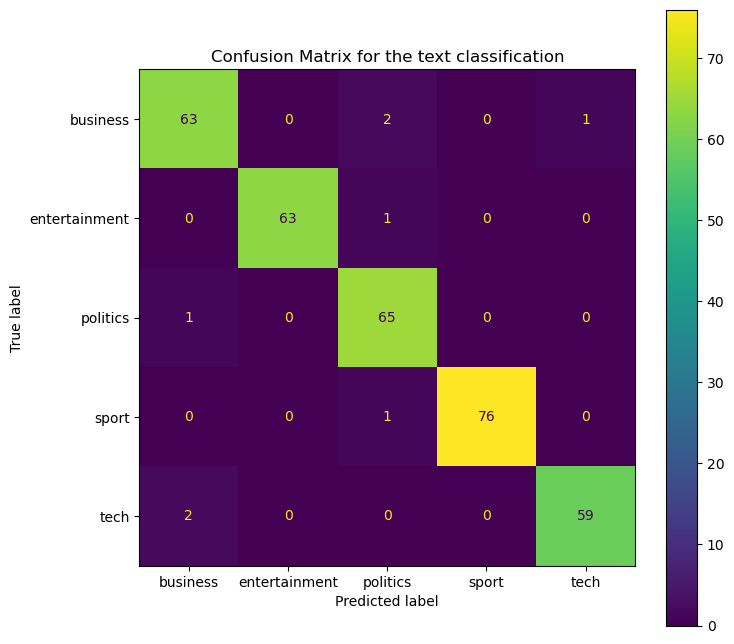

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the text classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);